# Text Processing

## Capturing Text Data

### Plain Text

In [1]:
import os

# Read in a plain text file
with open(os.path.join("data", "hieroglyph.txt"), "r") as f:
    text = f.read()
    print(text)

Hieroglyphic writing dates from c. 3000 BC, and is composed of hundreds of symbols. A hieroglyph can represent a word, a sound, or a silent determinative; and the same symbol can serve different purposes in different contexts. Hieroglyphs were a formal script, used on stone monuments and in tombs, that could be as detailed as individual works of art. In day-to-day writing, scribes used a cursive form of writing, called hieratic, which was quicker and easier. While formal hieroglyphs may be read in rows or columns in either direction (though typically written from right to left), hieratic was always written from right to left, usually in horizontal rows. A n


### Tabular Data

In [ ]:
import pandas as pd

# Extract text column from a dataframe
df = pd.read_csv(os.path.join("data", "news.csv"), encoding='cp1252')
df.head()[['publisher', 'title']]

# Convert text column to lowercase
df['title'] = df['title'].str.lower()
df.head()[['publisher', 'title']]

### Online Resource

In [3]:
import requests
import json

# Fetch data from a REST API
r = requests.get(
    "https://quotes.rest/qod.json")
res = r.json()
print(json.dumps(res, indent=4))

# Extract relevant object and field
q = res["contents"]["quotes"][0]
print(q["quote"], "\n--", q["author"])

{
    "success": {
        "total": 1
    },
    "contents": {
        "quotes": [
            {
                "quote": "If you like what you do, and you're lucky enough to be good at it, do it for that reason.",
                "length": "96",
                "author": "Phil Grimshaw",
                "tags": [
                    "inspire",
                    "life",
                    "luck",
                    "reason"
                ],
                "category": "inspire",
                "language": "en",
                "date": "2023-03-18",
                "permalink": "https://theysaidso.com/quote/phil-grimshaw-if-you-like-what-you-do-and-youre-lucky-enough-to-be-good-at-it-do",
                "id": "j1sPwFauvgEBPe9xEzmT3weF",
                "background": "https://theysaidso.com/img/qod/qod-inspire.jpg",
                "title": "Inspiring Quote of the day"
            }
        ]
    },
    "baseurl": "https://theysaidso.com",
    "copyright": {
        "year": 2025,

## Cleaning

In [4]:
import requests

# Fetch a web page
r = requests.get("https://news.ycombinator.com")
print(r.text)

<html lang="en" op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?JEjTSX3KstREz7YGEOBA">
        <link rel="shortcut icon" href="favicon.ico">
          <link rel="alternate" type="application/rss+xml" title="RSS" href="rss">
        <title>Hacker News</title></head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef">
        <tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tr><td style="width:18px;padding-right:4px"><a href="https://news.ycombinator.com"><img src="y18.gif" width="18" height="18" style="border:1px white solid;"></a></td>
                  <td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b>
                            <a href="newest">new</a> | <a href="front">past<

In [ ]:
import re

# Remove HTML tags using RegEx
pattern = re.compile(r'<.*?>')  # tags look like <...>
print(pattern.sub('', r.text))  # replace them with blank

In [ ]:
from bs4 import BeautifulSoup

# Remove HTML tags using Beautiful Soup library
soup = BeautifulSoup(r.text, "html5lib")
print(soup.get_text())

In [ ]:
# Find all articles
summaries = soup.find_all("tr", class_="athing")
summaries[0]

In [ ]:
# Extract title
summaries[0].find("a", class_="storylink").get_text().strip()

In [ ]:
# Find all articles, extract titles
articles = []
summaries = soup.find_all("tr", class_="athing")
for summary in summaries:
    title = summary.find("a", class_="storylink").get_text().strip()
    articles.append((title))

print(len(articles), "Article summaries found. Sample:")
print(articles[0])

## Normalization

### Case Normalization

In [10]:
# Sample text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"
print(text)

The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?


In [11]:
# Convert to lowercase
text = text.lower() 
print(text)

the first time you see the second renaissance it may look boring. look at it at least twice and definitely watch part 2. it will change your view of the matrix. are the human people the ones who started the war ? is ai a bad thing ?


### Punctuation Removal

In [12]:
import re

# Remove punctuation characters
text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
print(text)

the first time you see the second renaissance it may look boring  look at it at least twice and definitely watch part 2  it will change your view of the matrix  are the human people the ones who started the war   is ai a bad thing  


## Tokenization

In [13]:
# Split text into tokens (words)
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


### NLTK: Natural Language ToolKit

In [14]:
import os
import nltk
nltk.data.path.append(os.path.join(os.getcwd(), "nltk_data"))

In [15]:
# Another sample text
text = "Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers."
print(text)

Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers.


In [16]:
from nltk.tokenize import word_tokenize

# Split text into words using NLTK
words = word_tokenize(text)
print(words)

['Dr.', 'Smith', 'graduated', 'from', 'the', 'University', 'of', 'Washington', '.', 'He', 'later', 'started', 'an', 'analytics', 'firm', 'called', 'Lux', ',', 'which', 'catered', 'to', 'enterprise', 'customers', '.']


In [17]:
from nltk.tokenize import sent_tokenize

# Split text into sentences
sentences = sent_tokenize(text)
print(sentences)

['Dr. Smith graduated from the University of Washington.', 'He later started an analytics firm called Lux, which catered to enterprise customers.']


In [18]:
# List stop words
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
# Reset text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"

# Normalize it
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

# Tokenize it
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


In [20]:
# Remove stop words
words = [w for w in words if w not in stopwords.words("english")]
print(words)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'ones', 'started', 'war', 'ai', 'bad', 'thing']


### Sentence Parsing

In [21]:
import nltk

# Define a custom grammar
my_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")
parser = nltk.ChartParser(my_grammar)

# Parse a sentence
sentence = word_tokenize("I shot an elephant in my pajamas")
for tree in parser.parse(sentence):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


### Named Entity Recognition

In [6]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\alej6\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\alej6\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\alej6\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\alej6\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\alej6\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]   

True

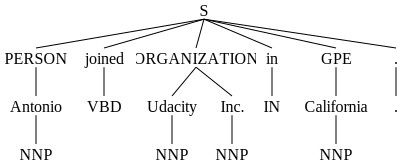

In [8]:
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize

ne_chunk(pos_tag(word_tokenize("Antonio joined Udacity Inc. in California.")))

## Stemming & Lemmatization

### Stemming

In [22]:
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['first', 'time', 'see', 'second', 'renaiss', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definit', 'watch', 'part', '2', 'chang', 'view', 'matrix', 'human', 'peopl', 'one', 'start', 'war', 'ai', 'bad', 'thing']


### Lemmatization

In [23]:
from nltk.stem.wordnet import WordNetLemmatizer

# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'started', 'war', 'ai', 'bad', 'thing']


In [24]:
# Lemmatize verbs by specifying pos
lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in lemmed]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'start', 'war', 'ai', 'bad', 'thing']
